# Part 1 - Player performance simulation based on morale using transition states
## Pressure to perform, make more/better plays, taking riskier decisions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
np.random.seed(3)

In [3]:
bukayo = "buyakosaka.xlsx"
df = pd.read_excel(bukayo)
column_data = df.iloc[:, 0].tolist()
print(column_data)

[0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [4]:
def calculate_transition_percentages(numbers):
    transitions = {}

    for i in range(len(numbers) - 1):
        current_number = numbers[i]
        next_number = numbers[i + 1]

        if current_number not in transitions:
            transitions[current_number] = {}

        if next_number not in transitions[current_number]:
            transitions[current_number][next_number] = 0

        transitions[current_number][next_number] += 1

    percentages = {}

    for current_number, next_numbers in transitions.items():
        total_transitions = sum(next_numbers.values())
        percentages[current_number] = {}

        for next_number, count in next_numbers.items():
            percentage = (count / total_transitions) * 100
            percentages[current_number][next_number] = percentage

    return percentages

In [5]:
transition_percentages = calculate_transition_percentages(column_data)
# Initialize an empty transition matrix
transition_matrix = [[0.0] * 4 for _ in range(4)]
result_matrix = []
# Populate the transition matrix
for i in range(4):
    for j in range(4):
        if j in transition_percentages[i]:
            transition_matrix[i][j] = transition_percentages[i][j] / 100

# Print the resulting transition matrix
for row in transition_matrix:
    result_matrix.append(row)
    
print(result_matrix)

[[0.6923076923076923, 0.28205128205128205, 0.02564102564102564, 0.0], [0.6875, 0.25, 0.0, 0.0625], [0.0, 0.5, 0.5, 0.0], [1.0, 0.0, 0.0, 0.0]]


In [6]:
StatesGoalsData = ['None','Once','Twice','Hat-Trick']

transition_states = [
    ['None-to-None', 'None-to-Once', 'None-to-Twice', 'None-to-Hat-Trick'],
    ['Once-to-None', 'Once-to-Once', 'Once-to-Twice', 'Once-to-Hat-Trick'],
    ['Twice-to-None', 'Twice-to-Once', 'Twice-to-Twice', 'Twice-to-Hat-Trick'],
    ['Hat-Trick-to-None', 'Hat-Trick-to-Once', 'Hat-Trick-to-Twice', 'Hat-Trick-to-Hat-Trick']
]

In [7]:
ScoringProcess = list()
NumMatches = 100
if column_data[0] == 0:
    InitialState = "None"
elif column_data[0] == 1:
    InitialState = "Once"
elif column_data[0] == 2:
    InitialState = "Twice"
else:
    InitialState = "Hat-Trick"
print('Recent match result =',InitialState)

Recent match result = None


In [8]:
for i in range(0, NumMatches):
    if InitialState == 'None':
        TransCondition = np.random.choice(transition_states[0],replace=True,p=result_matrix[0])
        if TransCondition == 'None-to-None':
            pass
        elif TransCondition == 'None-to-Once':
            InitialState = 'Once'
        elif TransCondition == 'None-to-Twice':
            InitialState = 'Twice'
        else:
            InitialState = 'Hat-Trick'
    elif InitialState == 'Once':
        TransCondition = np.random.choice(transition_states[1],replace=True,p=result_matrix[1])
        if TransCondition == 'Once-to-Once':
            pass
        elif TransCondition == 'Once-to-None':
            InitialState = 'None'
        elif TransCondition == 'Once-to-Twice':
            InitialState = 'Twice'
        else:
            InitialState = 'Hat-Trick'
    elif InitialState == 'Twice':
        TransCondition = np.random.choice(transition_states[2],replace=True,p=result_matrix[2])
        if TransCondition == 'Twice-to-Twice':
            pass
        elif TransCondition == 'Twice-to-None':
            InitialState = 'None'
        elif TransCondition == 'Twice-to-Once':
            InitialState = 'Once'
        else:
            InitialState = 'Hat-Trick'
    elif InitialState == 'Hat-Trick':
        TransCondition = np.random.choice(transition_states[3],replace=True,p=result_matrix[3])
        if TransCondition == 'Hat-Trick-to-Hat-Trick':
            pass
        elif TransCondition == 'Hat-Trick-to-None':
            InitialState = 'None'
        elif TransCondition == 'Hat-Trick-to-Once':
            InitialState = 'Once'
        else:
            InitialState = 'Twice'
            
    ScoringProcess.append(InitialState)
    print(InitialState)

None
Once
None
None
Once
Once
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Once
None
None
None
Once
None
None
None
Once
Hat-Trick
None
Once
Once
None
None
None
None
None
None
None
None
None
None
None
Once
None
None
None
None
None
None
None
None
None
None
Once
Once
Once
Once
None
None
None
None
None
None
None
None
Once
None
None
None
Once
None
None
None
None
None
None
None
None
None
None
Once
None
None
Once
None
Once
Once
Once
None
Once
Once
None
Once
None
None
None
None


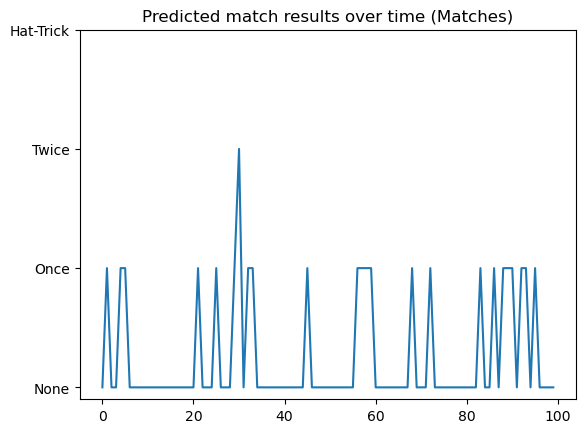

In [9]:
import matplotlib.pyplot as plt

custom_labels = ["None", "Once", "Twice", "Hat-Trick"]
plt.plot(ScoringProcess)
plt.yticks([0, 1, 2, 3])
plt.yticks([0, 1, 2, 3], custom_labels) 
plt.title("Predicted match results over time (Matches)")
plt.show()

# Part 2 - Team performative match simulation based on (Simulating Information Spread Lecture 11)
## Based on team statistics

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import random

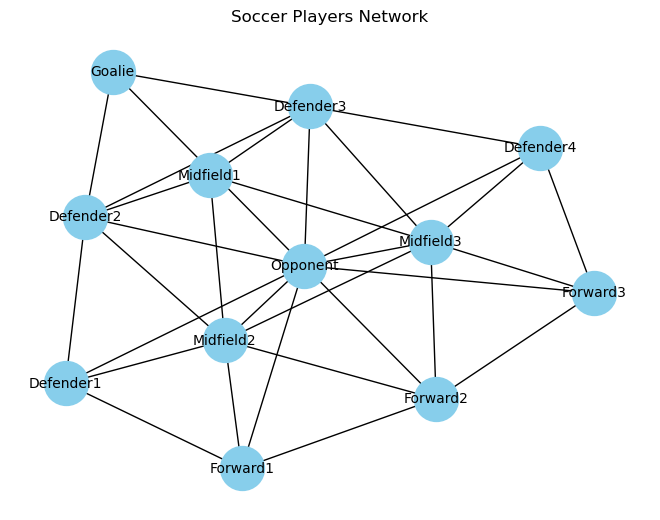

In [11]:
# Create an empty graph
G = nx.Graph()

# Add players as nodes (you can replace these with actual player names or IDs)
players = ["Opponent", "Goalie", "Defender1", "Defender2", "Defender3", "Defender4", "Midfield1", "Midfield2", "Midfield3", "Forward1", "Forward2", "Forward3"]
G.add_nodes_from(players)
# Define the connections (edges) between players
connections = [
    ("Goalie", "Opponent"), ("Goalie", "Defender2"), ("Goalie", "Defender3"),
    ("Defender1", "Opponent"), ("Defender1", "Forward1"), ("Defender1", "Midfield2"), ("Defender1", "Defender2"),
    ("Defender2", "Opponent"), ("Defender2", "Goalie"), ("Defender2", "Defender1"), ("Defender2", "Defender3"), ("Defender2", "Midfield1"), ("Defender2", "Midfield2"),
    ("Defender3", "Opponent"), ("Defender3", "Goalie"), ("Defender3", "Defender2"), ("Defender3", "Defender4"), ("Defender3", "Midfield1"), ("Defender3", "Midfield3"), 
    ("Defender4", "Opponent"), ("Defender4", "Midfield3"), ("Defender4", "Forward3"),
    ("Defender4", "Opponent"), ("Midfield1", "Defender2"), ("Midfield1", "Defender3"), ("Midfield1", "Midfield2"), ("Midfield1", "Midfield3"), 
    ("Midfield2", "Opponent"), ("Midfield2", "Defender1"), ("Midfield2", "Defender2"), ("Midfield2", "Midfield1"), ("Midfield2", "Midfield3"), ("Midfield2", "Forward1"), ("Midfield2", "Forward2"), 
    ("Midfield3", "Opponent"), ("Midfield3", "Defender3"), ("Midfield3", "Defender4"), ("Midfield3", "Midfield1"), ("Midfield3", "Midfield2"), ("Midfield3", "Forward2"), ("Midfield3", "Forward3"), 
    ("Forward1", "Opponent"), ("Forward1", "Defender1"), ("Forward1", "Midfield2"), ("Forward1", "Forward2"),
    ("Forward2", "Opponent"), ("Forward2", "Midfield2"), ("Forward2", "Midfield3"), ("Forward2", "Forward1"), ("Forward2", "Forward3"), 
    ("Forward3", "Opponent"), ("Forward3", "Defender4"), ("Forward3", "Midfield3"), ("Forward3", "Forward2"), 
]

G.add_edges_from(connections)

# Draw the graph
pos = nx.spring_layout(G)  # You can choose other layout algorithms as well
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=10)

# Show the plot
plt.title("Soccer Players Network")
plt.axis("off")  # Hide axes
plt.show()

In [12]:
class State:
    CANSHOOT = 0
    TEAM = 1
    OPPONENT = 2

STATE2COLOR = {
    State.CANSHOOT: "Green",
    State.TEAM: "Orange",
    State.OPPONENT: "Red",
}

In [13]:
# Set node attributes
np.random.seed(3)
for node in G.nodes:
    G.nodes[node]["dribbling"] = len(list(G.neighbors(node)))
    if node in ["Forward1", "Forward2", "Forward3", ]:
        G.nodes[node]["state"] = State.CANSHOOT
        G.nodes[node]["scoring"] = 0.1619047619
        G.nodes[node]["missing"] = 0.8380952381
    elif node in ["Defender1", "Defender2", "Defender3", "Defender4", "Midfield1", "Midfield2", "Midfield3", "Goalie"]:
        G.nodes[node]["state"] = State.TEAM
        G.nodes[node]["passing"] = 0.8177779568
        G.nodes[node]["crossing"] = 0.0685220432
        G.nodes[node]["mistake"] = 0.1137
    else:
        G.nodes[node]["state"] = State.OPPONENT
        G.nodes[node]["scoring"] = 0.07875
        G.nodes[node]["mistake"] =  0.3928571429
        G.nodes[node]["passing"] = 0.5283928571


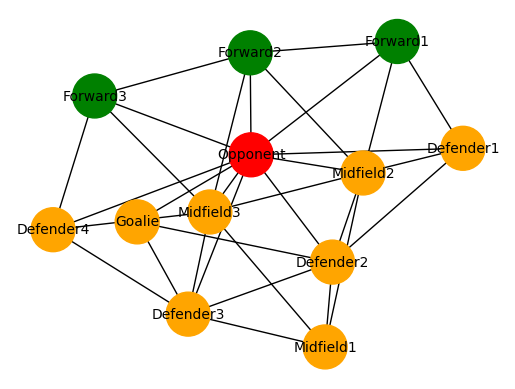

In [14]:
fig, ax = plt.subplots()
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color=[STATE2COLOR[G.nodes[node]["state"]] for node in G.nodes], font_size=10)

In [15]:
def update_state(G, node):
    # update states in G_copy to achieve simultaneous updates
    global GoalsPositive
    global GoalsNegative
    team_neighbors = []
    forward_neighbors = []
    opp_neighbors = []
    team_neighbors.clear()
    forward_neighbors.clear()
    neighbors = set(list(nx.all_neighbors(G,node)))
    for n in neighbors:
        if G.nodes[n]['state'] == State.TEAM:
            team_neighbors.append(n)
        elif G.nodes[n]['state'] == State.CANSHOOT:
            forward_neighbors.append(n)
    state = G.nodes[node]["state"]
    # case one:
    if state == State.TEAM: # if the node is a "team" node
        if G.nodes[node]["mistake"] > np.random.random(): #check whether player makes a mistake
            print("Team fumbles the pass, ball to opponent")
            return("Opponent")
        else:
            if G.nodes[node]["passing"] > np.random.random(): #check whether player passes to team
                print("Team passes to another teammate")
                return(random.choice(team_neighbors))
            else:
                print("Team passes to a forward shooter")
                return(random.choice(team_neighbors)) #ball goes to the forward
    # case two:
    elif state == State.CANSHOOT: # if the node is a "canshoot" node
        if G.nodes[node]["scoring"] > np.random.random():# check whether player scores
            GoalsPositive += 1
            print("Forward scores a goal! Ball now goes to the opponent")
            return("Opponent") #ball given to opponents
        else:
            print("Forward misses, ball caught by opponent")
            return("Opponent") #player misses, opponent takes the ball
    # case three:
    elif state == State.OPPONENT: # if the node is a "opponent" node
        if G.nodes[node]["mistake"] > np.random.random(): #check whether opponent makes a mistake
            print("Opponent fumbles the pass, ball to team")
            return(random.choice(team_neighbors)) #ball goes to the team
        else:
            if G.nodes[node]["passing"] > np.random.random(): #check whether opponent passes to opponent
                print("Opponent passes to opponent")
                return("Opponent") #ball goes to the opponent
            else:
                GoalsNegative += 1
                print("Opponent scores a goal! Ball now goes to the team")
                return(random.choice(team_neighbors)) #opponent scores

    else:
        print("Unsupported state, exit.")

In [16]:
GoalsPositive = 0
GoalsNegative = 0
GoalsTeam = 0
GoalsOpp = 0
node = "Opponent"
for _ in range(90):
    node = update_state(G, node)
print(GoalsPositive, GoalsNegative)

Opponent scores a goal! Ball now goes to the team
Team passes to another teammate
Team passes to a forward shooter
Team passes to another teammate
Team passes to a forward shooter
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to a forward shooter
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team fumbles the pass, ball to opponent
Opponent fumbles the pass, ball to team
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team fumbles the pass, ball to opponent
Opponent fumbles the pass, ball to team
Team passes to anot

# Part 3 - Team performative simulation (Addition of individual player traits, independent player titles, improved mock opponent and 

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

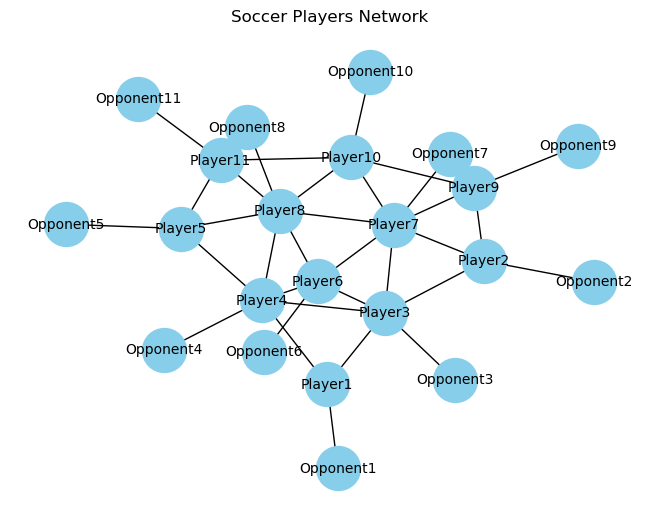

In [18]:
# Create an empty graph
SG = nx.Graph()

players = ["Player1", "Player2", "Player3", "Player4", "Player5", "Player6", "Player7", "Player8", "Player9", "Player10", "Player11"]
players = ["Opponent1", "Opponent2", "Opponent3", "Opponent4", "Opponent5", "Opponent6", "Opponent7", "Opponent8", "Opponent9", "Opponent10", "Opponent11"]
SG.add_nodes_from(players)

connections = [
    ("Player1", "Opponent1"), ("Player1", "Player3"), ("Player1", "Player4"),
    ("Player2", "Opponent2"), ("Player2", "Player9"), ("Player2", "Player7"), ("Player2", "Player3"),
    ("Player3", "Opponent3"), ("Player3", "Player1"), ("Player3", "Player2"), ("Player3", "Player4"), ("Player3", "Player6"), ("Player3", "Player7"),
    ("Player4", "Opponent4"), ("Player4", "Player1"), ("Player4", "Player3"), ("Player4", "Player5"), ("Player4", "Player6"), ("Player4", "Player8"), 
    ("Player5", "Opponent5"), ("Player5", "Player8"), ("Player5", "Player11"),
    ("Player6", "Opponent6"), ("Player6", "Player3"), ("Player6", "Player4"), ("Player6", "Player7"), ("Player6", "Player8"), 
    ("Player7", "Opponent7"), ("Player7", "Player2"), ("Player7", "Player3"), ("Player7", "Player6"), ("Player7", "Player8"), ("Player7", "Player9"), ("Player7", "Player10"), 
    ("Player8", "Opponent8"), ("Player8", "Player4"), ("Player8", "Player5"), ("Player8", "Player6"), ("Player8", "Player7"), ("Player8", "Player10"), ("Player8", "Player11"), 
    ("Player9", "Opponent9"), ("Player9", "Player2"), ("Player9", "Player7"), ("Player9", "Player10"),
    ("Player10", "Opponent10"), ("Player10", "Player7"), ("Player10", "Player8"), ("Player10", "Player9"), ("Player10", "Player11"), 
    ("Player11", "Opponent11"), ("Player11", "Player5"), ("Player11", "Player8"), ("Player11", "Player10")
]

SG.add_edges_from(connections)

# Draw the graph
pos = nx.spring_layout(SG)  # You can choose other layout algorithms as well
nx.draw(SG, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=10)

# Show the plot
plt.title("Soccer Players Network")
plt.axis("off")  # Hide axes
plt.show()

In [19]:
'''
Rules to implement
- Player must dribble successfully before attempting shot or passing
- If both attempt shot and passing are successful, passing will be chosen
- Player must have shot attempt before scoring
- Failing any stat roll results in the ball going to the opponent
- Opponent has similar statistics to the team, but can be customized if need be
'''
#Data taken from Fotmob.com
playerStatistics = [
   #["Player", shotattempts, scoring, passing, tackling, dribbling, name],
    ["Player1", 0, 0.64, 0.652, 0, 0, "Aaron Ramsdale"],
    ["Player2", 0.59, 0.5, 0.868, 0.667, 1, "Jakub Kiwior"],
    ["Player3", 0.85, 0.43, 0.893, 0.529, 0.333, "Gabriel"],
    ["Player4", 0.19, 0.38, 0.925, 0.607, 0.40, "William Saliba"],
    ["Player5", 0.24, 0.75, 0.872, 0.613, 0.429, "Ben White"],
    ["Player6", 0.07, 0, 0.909, 0.389, 0.333, "Jorginho"],
    ["Player7", 0.94, 0.35, 0.91, 0.618, 0.56, "Declan Rice"],
    ["Player8", 0.94, 0.33, 0.872, 0.382, 0.543, "Martin Ødegaard"],
    ["Player9", 0.64, 0.35, 0.762, 0.688, 0.571, "Leandro Trossard"],
    ["Player10", 0.92, 0.33, 0.841, 0.44, 0.435, "Kai Havertz"],
    ["Player11", 0.86, 0.35 ,0.831, 0.531, 0.476, "Bukayo Saka"],
]
passingStatistics = [
    [1, 0.2404509894],
    [2, 0.6585365854],
    [3, 0.1010124252]
]
duelStat = 0.46 #Kai Havertz, the current central midfield

In [20]:
#Shadow opponents
opponentStatistics = [
   #["Opponent", shotattempts, scoring, passing, tackling, dribbling, name],
    ["Opponent1", 0, 0.64, 0.652, 0, 0, "Shadow Ramsdale"],
    ["Opponent2", 0.59, 0.5, 0.868, 0.667, 1, "Shadow Kiwior"],
    ["Opponent3", 0.85, 0.43, 0.893, 0.529, 0.333, "Shadow Gabriel"],
    ["Opponent4", 0.19, 0.38, 0.925, 0.607, 0.40, "Shadow Saliba"],
    ["Opponent5", 0.24, 0.75, 0.872, 0.613, 0.429, "Shadow White"],
    ["Opponent6", 0.07, 0, 0.909, 0.389, 0.333, "Shadow Jorginho"],
    ["Opponent7", 0.94, 0.35, 0.91, 0.618, 0.56, "Shadow Rice"],
    ["Opponent8", 0.94, 0.33, 0.872, 0.382, 0.543, "Shadow Ødegaard"],
    ["Opponent9", 0.64, 0.35, 0.762, 0.688, 0.571, "Shadow Trossard"],
    ["Opponent10", 0.92, 0.33, 0.841, 0.44, 0.435, "Shadow Havertz"],
    ["Opponent11", 0.86, 0.35 ,0.831, 0.531, 0.476, "Shadow Saka"],
]

In [21]:
class State:
    TEAM = 0
    OPPONENT = 1

STATE2COLOR = {
    State.TEAM: "Green",
    State.OPPONENT: "Red",
}

In [22]:
# Set node attributes
np.random.seed(1)
for node in SG.nodes:
    SG.nodes[node]["dribbling"] = len(list(SG.neighbors(node)))
    #Importing team stats
    if node == playerStatistics[0][0]:
        SG.nodes[node]["state"] = State.TEAM
        SG.nodes[node]["shotattempts"] = playerStatistics[0][1]
        SG.nodes[node]["scoring"] = playerStatistics[0][2]
        SG.nodes[node]["passing"] = playerStatistics[0][3]
        SG.nodes[node]["tackling"] = playerStatistics[0][4]
        SG.nodes[node]["dribbling"] = playerStatistics[0][5]
        SG.nodes[node]["name"] = playerStatistics[0][6]
    elif node == playerStatistics[1][0]:
        SG.nodes[node]["state"] = State.TEAM
        SG.nodes[node]["shotattempts"] = playerStatistics[1][1]
        SG.nodes[node]["scoring"] = playerStatistics[1][2]
        SG.nodes[node]["passing"] = playerStatistics[1][3]
        SG.nodes[node]["tackling"] = playerStatistics[1][4]
        SG.nodes[node]["dribbling"] = playerStatistics[1][5]
        SG.nodes[node]["name"] = playerStatistics[1][6]
    elif node == playerStatistics[2][0]:
        SG.nodes[node]["state"] = State.TEAM
        SG.nodes[node]["shotattempts"] = playerStatistics[2][1]
        SG.nodes[node]["scoring"] = playerStatistics[2][2]
        SG.nodes[node]["passing"] = playerStatistics[2][3]
        SG.nodes[node]["tackling"] = playerStatistics[2][4]
        SG.nodes[node]["dribbling"] = playerStatistics[2][5]
        SG.nodes[node]["name"] = playerStatistics[2][6]
    elif node == playerStatistics[3][0]:
        SG.nodes[node]["state"] = State.TEAM
        SG.nodes[node]["shotattempts"] = playerStatistics[3][1]
        SG.nodes[node]["scoring"] = playerStatistics[3][2]
        SG.nodes[node]["passing"] = playerStatistics[3][3]
        SG.nodes[node]["tackling"] = playerStatistics[3][4]
        SG.nodes[node]["dribbling"] = playerStatistics[3][5]
        SG.nodes[node]["name"] = playerStatistics[3][6]
    elif node == playerStatistics[4][0]:
        SG.nodes[node]["state"] = State.TEAM
        SG.nodes[node]["shotattempts"] = playerStatistics[4][1]
        SG.nodes[node]["scoring"] = playerStatistics[4][2]
        SG.nodes[node]["passing"] = playerStatistics[4][3]
        SG.nodes[node]["tackling"] = playerStatistics[4][4]
        SG.nodes[node]["dribbling"] = playerStatistics[4][5]
        SG.nodes[node]["name"] = playerStatistics[4][6]
    elif node == playerStatistics[5][0]:
        SG.nodes[node]["state"] = State.TEAM
        SG.nodes[node]["shotattempts"] = playerStatistics[5][1]
        SG.nodes[node]["scoring"] = playerStatistics[5][2]
        SG.nodes[node]["passing"] = playerStatistics[5][3]
        SG.nodes[node]["tackling"] = playerStatistics[5][4]
        SG.nodes[node]["dribbling"] = playerStatistics[5][5]
        SG.nodes[node]["name"] = playerStatistics[5][6]
    elif node == playerStatistics[6][0]:
        SG.nodes[node]["state"] = State.TEAM
        SG.nodes[node]["shotattempts"] = playerStatistics[6][1]
        SG.nodes[node]["scoring"] = playerStatistics[6][2]
        SG.nodes[node]["passing"] = playerStatistics[6][3]
        SG.nodes[node]["tackling"] = playerStatistics[6][4]
        SG.nodes[node]["dribbling"] = playerStatistics[6][5]
        SG.nodes[node]["name"] = playerStatistics[6][6]
    elif node == playerStatistics[7][0]:
        SG.nodes[node]["state"] = State.TEAM
        SG.nodes[node]["shotattempts"] = playerStatistics[7][1]
        SG.nodes[node]["scoring"] = playerStatistics[7][2]
        SG.nodes[node]["passing"] = playerStatistics[7][3]
        SG.nodes[node]["tackling"] = playerStatistics[7][4]
        SG.nodes[node]["dribbling"] = playerStatistics[7][5]
        SG.nodes[node]["name"] = playerStatistics[7][6]
    elif node == playerStatistics[8][0]:
        SG.nodes[node]["state"] = State.TEAM
        SG.nodes[node]["shotattempts"] = playerStatistics[8][1]
        SG.nodes[node]["scoring"] = playerStatistics[8][2]
        SG.nodes[node]["passing"] = playerStatistics[8][3]
        SG.nodes[node]["tackling"] = playerStatistics[8][4]
        SG.nodes[node]["dribbling"] = playerStatistics[8][5]
        SG.nodes[node]["name"] = playerStatistics[8][6]
    elif node == playerStatistics[9][0]:
        SG.nodes[node]["state"] = State.TEAM
        SG.nodes[node]["shotattempts"] = playerStatistics[9][1]
        SG.nodes[node]["scoring"] = playerStatistics[9][2]
        SG.nodes[node]["passing"] = playerStatistics[9][3]
        SG.nodes[node]["tackling"] = playerStatistics[9][4]
        SG.nodes[node]["dribbling"] = playerStatistics[9][5]
        SG.nodes[node]["name"] = playerStatistics[9][6]
    elif node == playerStatistics[10][0]:
        SG.nodes[node]["state"] = State.TEAM
        SG.nodes[node]["shotattempts"] = playerStatistics[10][1]
        SG.nodes[node]["scoring"] = playerStatistics[10][2]
        SG.nodes[node]["passing"] = playerStatistics[10][3]
        SG.nodes[node]["tackling"] = playerStatistics[10][4]
        SG.nodes[node]["dribbling"] = playerStatistics[10][5]
        SG.nodes[node]["name"] = playerStatistics[10][6]
#Importing opponent stats
    elif node == opponentStatistics[0][0]:
        SG.nodes[node]["state"] = State.OPPONENT
        SG.nodes[node]["shotattempts"] = opponentStatistics[0][1]
        SG.nodes[node]["scoring"] = opponentStatistics[0][2]
        SG.nodes[node]["passing"] = opponentStatistics[0][3]
        SG.nodes[node]["tackling"] = opponentStatistics[0][4]
        SG.nodes[node]["dribbling"] = opponentStatistics[0][5]
        SG.nodes[node]["name"] = opponentStatistics[0][6]
    elif node == opponentStatistics[1][0]:
        SG.nodes[node]["state"] = State.OPPONENT
        SG.nodes[node]["shotattempts"] = opponentStatistics[1][1]
        SG.nodes[node]["scoring"] = opponentStatistics[1][2]
        SG.nodes[node]["passing"] = opponentStatistics[1][3]
        SG.nodes[node]["tackling"] = opponentStatistics[1][4]
        SG.nodes[node]["dribbling"] = opponentStatistics[1][5]
        SG.nodes[node]["name"] = opponentStatistics[1][6]
    elif node == opponentStatistics[2][0]:
        SG.nodes[node]["state"] = State.OPPONENT
        SG.nodes[node]["shotattempts"] = opponentStatistics[2][1]
        SG.nodes[node]["scoring"] = opponentStatistics[2][2]
        SG.nodes[node]["passing"] = opponentStatistics[2][3]
        SG.nodes[node]["tackling"] = opponentStatistics[2][4]
        SG.nodes[node]["dribbling"] = opponentStatistics[2][5]
        SG.nodes[node]["name"] = opponentStatistics[2][6]
    elif node == opponentStatistics[3][0]:
        SG.nodes[node]["state"] = State.OPPONENT
        SG.nodes[node]["shotattempts"] = opponentStatistics[3][1]
        SG.nodes[node]["scoring"] = opponentStatistics[3][2]
        SG.nodes[node]["passing"] = opponentStatistics[3][3]
        SG.nodes[node]["tackling"] = opponentStatistics[3][4]
        SG.nodes[node]["dribbling"] = opponentStatistics[3][5]
        SG.nodes[node]["name"] = opponentStatistics[3][6]
    elif node == opponentStatistics[4][0]:
        SG.nodes[node]["state"] = State.OPPONENT
        SG.nodes[node]["shotattempts"] = opponentStatistics[4][1]
        SG.nodes[node]["scoring"] = opponentStatistics[4][2]
        SG.nodes[node]["passing"] = opponentStatistics[4][3]
        SG.nodes[node]["tackling"] = opponentStatistics[4][4]
        SG.nodes[node]["dribbling"] = opponentStatistics[4][5]
        SG.nodes[node]["name"] = opponentStatistics[4][6]
    elif node == opponentStatistics[5][0]:
        SG.nodes[node]["state"] = State.OPPONENT
        SG.nodes[node]["shotattempts"] = opponentStatistics[5][1]
        SG.nodes[node]["scoring"] = opponentStatistics[5][2]
        SG.nodes[node]["passing"] = opponentStatistics[5][3]
        SG.nodes[node]["tackling"] = opponentStatistics[5][4]
        SG.nodes[node]["dribbling"] = opponentStatistics[5][5]
        SG.nodes[node]["name"] = opponentStatistics[5][6]
    elif node == opponentStatistics[6][0]:
        SG.nodes[node]["state"] = State.OPPONENT
        SG.nodes[node]["shotattempts"] = opponentStatistics[6][1]
        SG.nodes[node]["scoring"] = opponentStatistics[6][2]
        SG.nodes[node]["passing"] = opponentStatistics[6][3]
        SG.nodes[node]["tackling"] = opponentStatistics[6][4]
        SG.nodes[node]["dribbling"] = opponentStatistics[6][5]
        SG.nodes[node]["name"] = opponentStatistics[6][6]
    elif node == opponentStatistics[7][0]:
        SG.nodes[node]["state"] = State.OPPONENT
        SG.nodes[node]["shotattempts"] = opponentStatistics[7][1]
        SG.nodes[node]["scoring"] = opponentStatistics[7][2]
        SG.nodes[node]["passing"] = opponentStatistics[7][3]
        SG.nodes[node]["tackling"] = opponentStatistics[7][4]
        SG.nodes[node]["dribbling"] = opponentStatistics[7][5]
        SG.nodes[node]["name"] = opponentStatistics[7][6]
    elif node == opponentStatistics[8][0]:
        SG.nodes[node]["state"] = State.OPPONENT
        SG.nodes[node]["shotattempts"] = opponentStatistics[8][1]
        SG.nodes[node]["scoring"] = opponentStatistics[8][2]
        SG.nodes[node]["passing"] = opponentStatistics[8][3]
        SG.nodes[node]["tackling"] = opponentStatistics[8][4]
        SG.nodes[node]["dribbling"] = opponentStatistics[8][5]
        SG.nodes[node]["name"] = opponentStatistics[8][6]
    elif node == opponentStatistics[9][0]:
        SG.nodes[node]["state"] = State.OPPONENT
        SG.nodes[node]["shotattempts"] = opponentStatistics[9][1]
        SG.nodes[node]["scoring"] = opponentStatistics[9][2]
        SG.nodes[node]["passing"] = opponentStatistics[9][3]
        SG.nodes[node]["tackling"] = opponentStatistics[9][4]
        SG.nodes[node]["dribbling"] = opponentStatistics[9][5]
        SG.nodes[node]["name"] = opponentStatistics[9][6]
    elif node == opponentStatistics[10][0]:
        SG.nodes[node]["state"] = State.OPPONENT
        SG.nodes[node]["shotattempts"] = opponentStatistics[10][1]
        SG.nodes[node]["scoring"] = opponentStatistics[10][2]
        SG.nodes[node]["passing"] = opponentStatistics[10][3]
        SG.nodes[node]["tackling"] = opponentStatistics[10][4]
        SG.nodes[node]["dribbling"] = opponentStatistics[10][5]
        SG.nodes[node]["name"] = opponentStatistics[10][6]

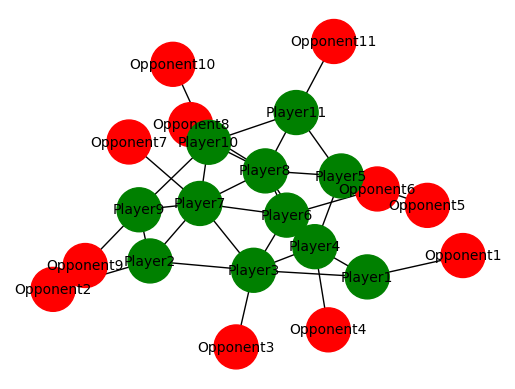

In [23]:
fig, ax = plt.subplots()
pos = nx.spring_layout(SG)
nx.draw(SG, pos, with_labels=True, node_size=1000, node_color=[STATE2COLOR[SG.nodes[node]["state"]] for node in SG.nodes], font_size=10)

In [31]:
def advanced_pass(G, node, state, distance):
    
    temp_neighbors = []
    temp_neighbors.clear()
    temp2_neighbors = []
    temp2_neighbors.clear()
    temp3_neighbors = []
    temp3_neighbors.clear()
    temp4_neighbors = []
    temp4_neighbors.clear()
    temp5_neighbors = []
    temp5_neighbors.clear()
    temp6_neighbors = []
    temp6_neighbors.clear()
    
    if (distance == 1):
        
        neighbors = set(list(nx.all_neighbors(G,node)))
        
        for n in neighbors:
            if G.nodes[n]['state'] == state: #filters for team
                temp_neighbors.append(n) #contains neighbours of node
        
        return random.choice(temp_neighbors)
        
    elif (distance == 2):
        
        neighbors = set(list(nx.all_neighbors(G,node)))
        
        for n in neighbors:
            if G.nodes[n]['state'] == state: #filters for team
                temp_neighbors.append(n) #contains neighbours of node
        
        for n in temp_neighbors:
            temp2_neighbors = set(list(nx.all_neighbors(G,n))) #find 2nd neighbour
            
        for n in temp2_neighbors:
            if G.nodes[n]['state'] == state: #filters for team
                temp3_neighbors.append(n) #contains neighbours of node
        
        for n in temp3_neighbors:
            if not(n in neighbors) or not(n in temp_neighbors):
                temp4_neighbors.append(n)
                
        return random.choice(temp4_neighbors)
    
    elif (distance == 3):
        
        neighbors = set(list(nx.all_neighbors(G,node)))
        
        for n in neighbors:
            if G.nodes[n]['state'] == state: #filters for team
                temp_neighbors.append(n) #contains neighbours of node
        
        for n in temp_neighbors:
            temp2_neighbors = set(list(nx.all_neighbors(G,n))) #find 2nd neighbour
            
        for n in temp2_neighbors:
            if G.nodes[n]['state'] == state: #filters for team
                temp3_neighbors.append(n) #contains neighbours of node
            
        for n in temp3_neighbors:
            temp4_neighbors = set(list(nx.all_neighbors(G,n))) #find 3rd neighbour
            
        for n in temp4_neighbors:
            if G.nodes[n]['state'] == state: #filters for team
                temp5_neighbors.append(n) #contains neighbours of node
        
        for n in temp5_neighbors:
            if not(n in neighbors) or not(n in temp_neighbors) or not(n in temp2_neighbors):
                temp6_neighbors.append(n)
                
        return random.choice(temp6_neighbors)
    

In [25]:
def update_state(G, node):
    # update states in G_copy to achieve simultaneous updates
    global GoalsPositive
    global GoalsNegative
    team_neighbors = []
    opp_neighbors = []
    team_neighbors.clear()
    opp_neighbors.clear()
    neighbors = set(list(nx.all_neighbors(G,node)))
    for n in neighbors:
        if G.nodes[n]['state'] == State.TEAM:
            team_neighbors.append(n)
        else:
            opp_neighbors.append(n)
    state = G.nodes[node]["state"]
    # case one:
    if state == State.TEAM: # if the node is a "team" node
        if G.nodes[node]["dribbling"] > np.random.random(): #dribble check
            oppnode = random.choice(opp_neighbors) #opponent tackle check
            if G.nodes[oppnode]["tackling"] > np.random.random():
                print(G.nodes[oppnode]["name"] + " tackles " + G.nodes[node]["name"] + " for the ball!")
                return(oppnode)
            else:
                if G.nodes[node]["shotattempts"] > np.random.random():
                    print(G.nodes[node]["name"] + " has an open shot")
                    if G.nodes[node]["scoring"] > np.random.random():
                        print(G.nodes[node]["name"] + " scores!")
                        GoalsPositive += 1
                        return("Opponent10")
                    else:
                        print(G.nodes[node]["name"] + " misses! " + G.nodes[oppnode]["name"] + " got the ball")
                        return(oppnode)               
                else:
                    if G.nodes[node]["passing"] > np.random.random():
                        if passingStatistics[0][1] < np.random.random():
                            teamnode = advanced_pass(G, node, State.TEAM, 1)
                        elif (passingStatistics[0][1] + passingStatistics[1][1]) < np.random.random():
                            teamnode = advanced_pass(G, node, State.TEAM, 2)
                        else:
                            teamnode = advanced_pass(G, node, State.TEAM, 3)
                        print(G.nodes[node]["name"] + " passes to " + G.nodes[teamnode]["name"])
                        return(teamnode)
                    else:
                        print("No opportunities for " + G.nodes[node]["name"] + ", they attempts to dribble")
                        return(node)
        else:
            randnode = random.choice(list(nx.all_neighbors(G,node)))
            print(G.nodes[node]["name"] + " fails to dribble, " + G.nodes[randnode]["name"] + " intercepts the ball")
            return(randnode)
    # case two:
    elif state == State.OPPONENT: # if the node is a "team" node
        if G.nodes[node]["dribbling"] > np.random.random(): #dribble check
            teamnode = random.choice(team_neighbors) #team tackle check
            if G.nodes[teamnode]["tackling"] > np.random.random():
                print(G.nodes[teamnode]["name"] + " tackles " + G.nodes[node]["name"] + " for the ball!")
                return(teamnode)
            else: #no tackle
                if G.nodes[node]["shotattempts"] > np.random.random(): #shot attempt?
                    print(G.nodes[node]["name"] + " has an open shot")
                    if G.nodes[node]["scoring"] > np.random.random(): #scoring?
                        print(G.nodes[node]["name"] + " scores!")
                        GoalsNegative += 1
                        return("Player10")
                    else: # missed
                        print(G.nodes[node]["name"] + " misses! " + G.nodes[teamnode]["name"] + " got the ball")
                        return(teamnode)               
                else:#passing?
                    if G.nodes[node]["passing"] > np.random.random(): #passes ball
                        tempnode = random.choice(team_neighbors)
                        tempneighbors = set(list(nx.all_neighbors(G,tempnode)))
                        for n in tempneighbors:
                            if G.nodes[n]['state'] == State.OPPONENT:
                                oppnode = n
                        print(G.nodes[node]["name"] + " passes to " + G.nodes[oppnode]["name"])
                        return(oppnode)
                    else: #keep ball
                        print("No opportunities for " + G.nodes[node]["name"] + ", they attempts to dribble")
                        return(node)
        else: #fails dribble (mistake), ball rolls to someone else RANDOM
            randnode = random.choice(list(nx.all_neighbors(G,node)))
            print(G.nodes[node]["name"] + " fails to dribble, " + G.nodes[randnode]["name"] + " intercepts the ball")
            return(randnode)
    else:
        print("Unsupported state, exit.")

In [32]:
GoalsPositive = 0
GoalsNegative = 0
GoalsTeam = 0
GoalsOpp = 0
kickoff = ["Opponent10", "Player10"]
node = random.choice(kickoff)
for _ in range(90):
    node = update_state(SG, node)
print(GoalsPositive, GoalsNegative)

Shadow Havertz fails to dribble, Kai Havertz intercepts the ball
Kai Havertz fails to dribble, Leandro Trossard intercepts the ball
No opportunities for Leandro Trossard, they attempts to dribble
Leandro Trossard has an open shot
Leandro Trossard misses! Shadow Trossard got the ball
Leandro Trossard tackles Shadow Trossard for the ball!
Leandro Trossard has an open shot
Leandro Trossard misses! Shadow Trossard got the ball
Leandro Trossard tackles Shadow Trossard for the ball!
Shadow Trossard tackles Leandro Trossard for the ball!
Shadow Trossard passes to Shadow Trossard
Shadow Trossard fails to dribble, Leandro Trossard intercepts the ball
Shadow Trossard tackles Leandro Trossard for the ball!
Shadow Trossard has an open shot
Shadow Trossard misses! Leandro Trossard got the ball
Shadow Trossard tackles Leandro Trossard for the ball!
Leandro Trossard tackles Shadow Trossard for the ball!
Leandro Trossard fails to dribble, Kai Havertz intercepts the ball
Kai Havertz fails to dribble, M

In [38]:
results = []
for i in range (100):
    GoalsPositive = 0
    GoalsNegative = 0
    GoalsTeam = 0
    GoalsOpp = 0
    kickoff = ["Opponent10", "Player10"]
    node = random.choice(kickoff)
    for _ in range(90):
        node = update_state(SG, node)
    if GoalsPositive > GoalsNegative:
        results.append(1)
    else:
        results.append(0)
print (results)

Shadow Havertz fails to dribble, Kai Havertz intercepts the ball
Shadow Havertz tackles Kai Havertz for the ball!
Shadow Havertz has an open shot
Shadow Havertz scores!
Kai Havertz fails to dribble, Martin Ødegaard intercepts the ball
Shadow Ødegaard tackles Martin Ødegaard for the ball!
Shadow Ødegaard fails to dribble, Martin Ødegaard intercepts the ball
Martin Ødegaard passes to Declan Rice
Shadow Rice tackles Declan Rice for the ball!
Shadow Rice fails to dribble, Declan Rice intercepts the ball
Shadow Rice tackles Declan Rice for the ball!
Declan Rice tackles Shadow Rice for the ball!
Declan Rice passes to Martin Ødegaard
Martin Ødegaard fails to dribble, Declan Rice intercepts the ball
Declan Rice fails to dribble, Gabriel intercepts the ball
Shadow Gabriel tackles Gabriel for the ball!
Shadow Gabriel fails to dribble, Gabriel intercepts the ball
Gabriel has an open shot
Gabriel misses! Shadow Gabriel got the ball
Shadow Gabriel fails to dribble, Gabriel intercepts the ball
Gabri

In [46]:
win = 0
loss = 0
for result in results:
    if result == 1:
        win += 1
    else:
        loss += 1
print ("Win percentage:", (win/(loss+win)*100),"%")
print ("Out of:", win + loss, "matches")

Win percentage: 61.0 %
Out of: 100 matches
